## Machine Learning and Regression Analysis

#### 0 Introduction
#### 1 Setup

### Part 1
#### 2 Data cleaning
#### 3 Data prep for regression analysis
#### 4 Regression analysis
#### 5 Interpretation of results

### Part 2
#### 6 The elbow technique
#### 7 k-means clustering

---------------------------------------------------------------------------------------------------


# 0 Introduction
### Scenario
HailMary Roofing Company, LLC is looking to expand their business into new states. Repair and replacement from hail damage is their specialty and makes up a significant portion of their business. They've hired a data analyst to identify the best US states for their new roofing teams.

### Summary
The NOAA Storm Events Database is a comprehensive dataset maintained by the National Oceanic and Atmospheric Administration (NOAA). It records severe weather events across the United States, including hail, tornadoes, floods, and other significant storms. The dataset provides detailed event information, such as date, location (state and county), event magnitude (e.g., hail size), and reported damages. With data spanning multiple years, it serves as a valuable resource for analyzing historical weather patterns and assessing the frequency and impact of severe storms.
The NOAA Storm Events Database was chosen for this analysis because it provides detailed records of hail events across the United States. Hail damage is a major driver of roofing repairs and replacements, making this dataset highly relevant to identifying expansion opportunities for the roofing company. The dataset includes state- and county-level geographic data, allowing for targeted analysis of high-risk areas. Additionally, its historical coverage enables trend analysis to identify regions with consistent hail activity, helping the company make informed business decisions about where to expand.

The American Community Survey (ACS) is a nationwide survey conducted by the U.S. Census Bureau that provides detailed demographic, social, economic, and housing data every year. The housing data from the ACS includes statistics on housing occupancy, types of housing units, home values, mortgage status, rent, and housing costs. This data is essential for understanding housing conditions and trends at the local level, such as counties and cities. This data can be used to help select potential locations that would support business expansion. Additional information about the dataset can be found here: https://www.census.gov/programs-surveys/acs/technical-documentation/code-lists.html

The counties geojson provided by https://gis-txdot.opendata.arcgis.com/datasets/texas-county-boundaries/explore.


# 1 Setup

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

C:\Users\nsmith\AppData\Local\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# This option ensures the graphs you create are displayed without the need to "call" them specifically.
%matplotlib inline

### Load data

In [3]:
# Define path to data folder
data_path = r"C:\Users\nsmith\OneDrive - Georgia Poultry Laboratory Network\CareerFoundry\02 - Data Immersion\Achievement 6\01 Data"

In [4]:
# Generate a file path to the data
df_path = os.path.join(data_path, "merged_data.csv")

In [5]:
# Load dataframe
df = pd.read_csv(df_path)

# Part 1
--------------------------------------------------

# 2 Data Cleaning

##### Examine data

In [6]:
# print column headers
df.columns

Index(['County', 'HOUSING OCCUPANCY Total housing units',
       'BEDROOMS Total housing units', 'HOUSING TENURE Occupied housing units',
       'HOUSING TENURE Owner-occupied', 'HOUSING TENURE Renter-occupied',
       'SELECTED CHARACTERISTICS Occupied housing units',
       'VALUE (owner occupied) Median (dollars)',
       'MORTGAGE STATUS Owner-occupied units',
       'MORTGAGE STATUS Housing units with a mortgage',
       'MORTGAGE STATUS Housing units without a mortgage',
       'Single_Family_Homes', 'Other_Housing_Types', 'Newer_Homes',
       'Older_Homes', 'sm_house', 'med_house', 'lg_house', 'CZ_NAME',
       'DAMAGE_PROPERTY_NUMERIC', 'Total_Storm_Events'],
      dtype='object')

In [7]:
# print first 50 rows of the table
df.head(50)

,County,HOUSING OCCUPANCY Total housing units,BEDROOMS Total housing units,HOUSING TENURE Occupied housing units,HOUSING TENURE Owner-occupied,HOUSING TENURE Renter-occupied,SELECTED CHARACTERISTICS Occupied housing units,VALUE (owner occupied) Median (dollars),MORTGAGE STATUS Owner-occupied units,MORTGAGE STATUS Housing units with a mortgage,...,Single_Family_Homes,Other_Housing_Types,Newer_Homes,Older_Homes,sm_house,med_house,lg_house,CZ_NAME,DAMAGE_PROPERTY_NUMERIC,Total_Storm_Events
0,ANGELINA,37288,37288,31996,20888,11108,31996,167400,20888,10565.0,...,23456,6431,11951,25337,12115,24153,1020,ANGELINA,0.000000e+00,10.0
1,BASTROP,41426,41426,38591,28828,9763,38591,317000,28828,12773.0,...,26189,2870,21784,19642,10760,28798,1868,BASTROP,0.000000e+00,23.0
2,BELL,158782,158782,145863,85609,60254,145863,262300,85609,53617.0,...,106655,44758,77190,81592,46861,106961,4960,BELL,2.934000e+06,80.0
3,BEXAR,836113,836113,758070,449545,308525,758070,277000,449545,270266.0,...,535338,277313,335867,500246,326105,477853,32155,BEXAR,0.000000e+00,164.0
4,BOWIE,40178,40178,36110,23235,12875,36110,160700,23235,11274.0,...,26205,8512,11065,29113,15366,24235,577,BOWIE,0.000000e+00,23.0
5,BRAZORIA,154657,154657,138692,101477,37215,138692,304700,101477,63070.0,...,112146,27545,73163,81494,40748,105590,8319,BRAZORIA,0.000000e+00,6.0
6,BRAZOS,102864,102864,92216,42183,50033,92216,309300,42183,24072.0,...,49999,46624,51407,51457,43988,55489,3387,BRAZOS,2.080000e+04,33.0
7,CAMERON,162060,162060,143033,94661,48372,143033,154200,94661,35104.0,...,105617,38011,64207,97853,61035,97413,3612,CAMERON,0.000000e+00,15.0
8,COLLIN,453903,453903,431746,275791,155955,431746,513100,275791,191187.0,...,305710,140838,269342,184561,137984,271714,44205,COLLIN,1.302859e+09,124.0
9,COMAL,82086,82086,75234,58955,16279,75234,465900,58955,39020.0,...,61852,13327,50059,32027,21930,55604,4552,COMAL,0.000000e+00,45.0


##### Missing values

In [8]:
# Check for missing values
df.isnull().sum()

County                                              0
HOUSING OCCUPANCY Total housing units               0
BEDROOMS Total housing units                        0
HOUSING TENURE Occupied housing units               0
HOUSING TENURE Owner-occupied                       0
HOUSING TENURE Renter-occupied                      0
SELECTED CHARACTERISTICS Occupied housing units     0
VALUE (owner occupied) Median (dollars)             0
MORTGAGE STATUS Owner-occupied units                0
MORTGAGE STATUS Housing units with a mortgage       3
MORTGAGE STATUS Housing units without a mortgage    3
Single_Family_Homes                                 0
Other_Housing_Types                                 0
Newer_Homes                                         0
Older_Homes                                         0
sm_house                                            0
med_house                                           0
lg_house                                            0
CZ_NAME                     

Missing values for storm-related fields mean that those counties did not report any hail events

##### Duplicates check

In [9]:
# create a variable containing all duplicate rows
dups = df.duplicated()

In [10]:
# view count of duplicate rows
dups.shape # No duplicates

(56,)

##### Extreme values checks

C:\Users\nsmith\AppData\Local\Temp\ipykernel_19220\2516410762.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['VALUE (owner occupied) Median (dollars)'], bins=25)


<Axes: xlabel='VALUE (owner occupied) Median (dollars)', ylabel='Density'>

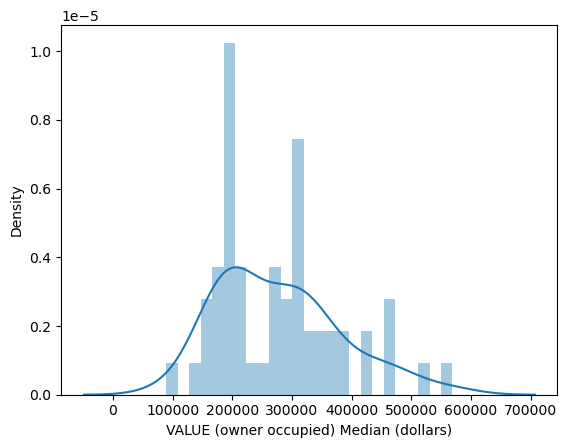

In [11]:
# create a histogram of values to check for outliers
sns.distplot(df['VALUE (owner occupied) Median (dollars)'], bins=25)

C:\Users\nsmith\AppData\Local\Temp\ipykernel_19220\2792378052.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lg_house'], bins=25)


<Axes: xlabel='lg_house', ylabel='Density'>

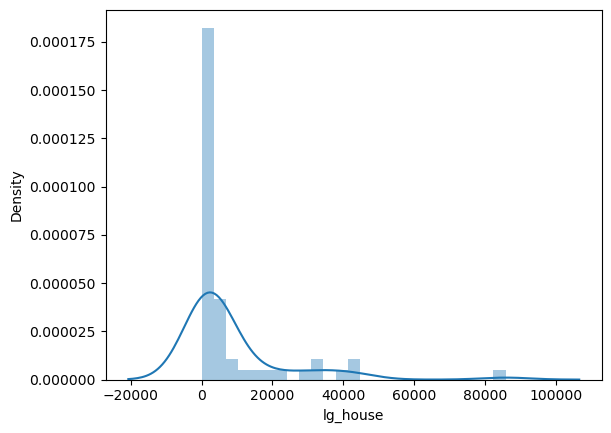

In [12]:
# create a histogram of values to check for outliers
sns.distplot(df['lg_house'], bins=25)

In [13]:
# Check the mean
df['VALUE (owner occupied) Median (dollars)'].mean()

277864.28571428574

In [14]:
# Check the median
df['VALUE (owner occupied) Median (dollars)'].median()

268400.0

In [15]:
# Check the max
df['VALUE (owner occupied) Median (dollars)'].max()

569000

# 3 Data prep

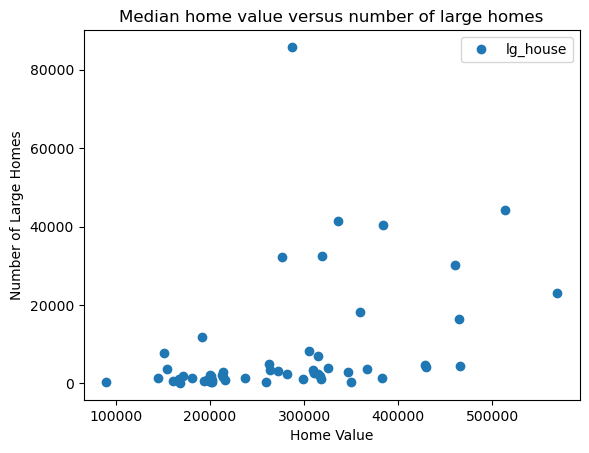

In [16]:
# Create a scatterplot using matplotlib

df.plot(x = 'VALUE (owner occupied) Median (dollars)', y='lg_house',style='o') # The style option creates a scatterplot
plt.title('Median home value versus number of large homes')  
plt.xlabel('Home Value')  
plt.ylabel('Number of Large Homes')  
plt.show()

Hypothesis: If there are more large homes in a county, then the median home value will be higher.

#### Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [17]:
# reshape the two variables of interest
X = df['lg_house'].values.reshape(-1,1)
y = df['VALUE (owner occupied) Median (dollars)'].values.reshape(-1,1)

In [18]:
# View array x
X

array([[ 1020],
       [ 1868],
       [ 4960],
       [32155],
       [  577],
       [ 8319],
       [ 3387],
       [ 3612],
       [44205],
       [ 4552],
       [  810],
       [32576],
       [30152],
       [  756],
       [ 3584],
       [11886],
       [40304],
       [ 6870],
       [ 2347],
       [  817],
       [ 4047],
       [85807],
       [  275],
       [ 4589],
       [ 2168],
       [ 7715],
       [  269],
       [  477],
       [ 1894],
       [ 2567],
       [ 2881],
       [  932],
       [ 1626],
       [ 3322],
       [ 2387],
       [18182],
       [  390],
       [ 2979],
       [ 1313],
       [ 1385],
       [ 1436],
       [ 1319],
       [ 4100],
       [  489],
       [ 3252],
       [  447],
       [41521],
       [ 2260],
       [  652],
       [23110],
       [  754],
       [ 1186],
       [ 1913],
       [  121],
       [16297],
       [ 1129]], dtype=int64)

In [19]:
# View array y
y

array([[167400],
       [317000],
       [262300],
       [277000],
       [160700],
       [304700],
       [309300],
       [154200],
       [513100],
       [465900],
       [216100],
       [319100],
       [460300],
       [196500],
       [366500],
       [191100],
       [384100],
       [315000],
       [281700],
       [197700],
       [325000],
       [287100],
       [201900],
       [428400],
       [212500],
       [151200],
       [350100],
       [259800],
       [171000],
       [310900],
       [347000],
       [201200],
       [213900],
       [264100],
       [314500],
       [359800],
       [201500],
       [213500],
       [180500],
       [383100],
       [144800],
       [236900],
       [429700],
       [193200],
       [272700],
       [ 89600],
       [336000],
       [200300],
       [198500],
       [569000],
       [202400],
       [298600],
       [200800],
       [168100],
       [464800],
       [318300]], dtype=int64)

#### Split the data into two sets: a training set and a test set - 70 training/30 testing

In [20]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4 Regression analysis

In [21]:
# Create a regression object to fit onto the training set
regression = LinearRegression()

In [22]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

#### Create a prediction for y (number of large houses per county) on the test set.

In [23]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

#### Create a plot that shows the regression line on the test set

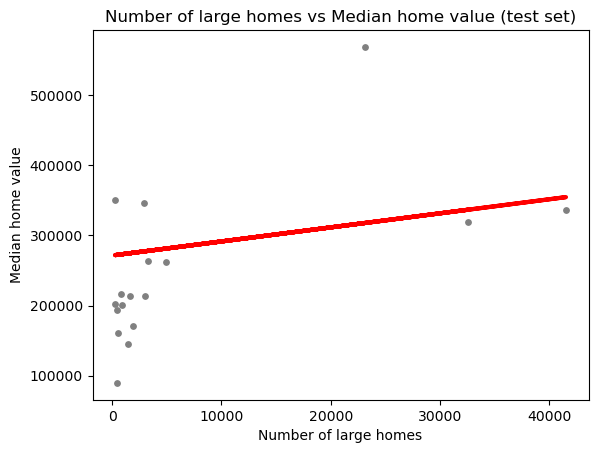

In [24]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of large homes vs Median home value (test set)')
plot_test.xlabel('Number of large homes')
plot_test.ylabel('Median home value')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.00604367]]
Mean squared error:  10366728379.296106
R2 score:  0.10279891483369419


Explaination of statistics:
- Slope (coefficient): shows the estimated change in median home value per increase in large homes.
- MSE: average squared difference between actual and predicted values.
- R²: indicates how well the model explains the variance in the data.

In [27]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,89600,272307.912330
1,264100,278075.287882
2,144800,274291.889520
3,350100,271950.836557
4,319100,336760.089408
5,262300,281361.187413
6,213900,274673.037817
7,193200,272392.166164
8,336000,354704.150037
9,347000,277190.622623


##### Compare how the regression fits the training set

In [28]:
# evaluate how well the model fits the training data (vs. test)
y_predicted_train = regression.predict(X_train)

In [29]:
# recalculate the R2 and MSE
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
# print the calculated values
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.00604367]]
Mean squared error:  8364547033.319156
R2 score:  0.11609329460305651


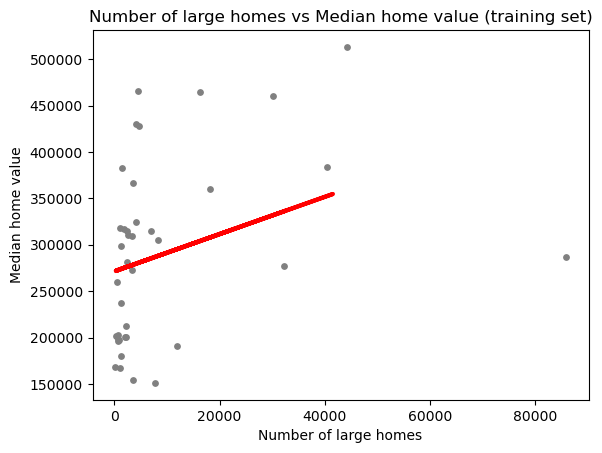

In [31]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of large homes vs Median home value (training set)')
plot_test.xlabel('Number of large homes')
plot_test.ylabel('Median home value')
plot_test.show()

# 5 Interpretation of results

For every additional large home in a county, the median home value increases by approximately $2 (indicated by slope).
This is a positive relationship, but a small effect considering that home values are usually in the hundreds of thousands. The MSE value is very high and the R2 value is low. Both indicate that the relationship between the two variables, while positive, is weak. While counties with more large homes tend to have slightly higher home values, many other factors likely influence home prices more strongly.

The model is OK, but there are likely many other factors involved in median home price than just the number of large homes, as there are many factors influencing the cost of a house other than size. Including additional variables could improve the model.

This data may be biased by the fact that only counties with populations greater than 65,000 have reported data. Rural counties with small populations have likely been excluded from the analysis, and may have a different profile in terms of house size and value.

# Part 2
-----------------------------------------------------------------

# 6 The elbow technique

### Data prep

- Ensure all features are numeric (floats or ints).
- Convert features to the same scale (use StandardScaler or similar).
- Ensure no missing values are present in the dataset.

In [32]:
# check field types
df.dtypes

County                                               object
HOUSING OCCUPANCY Total housing units                 int64
BEDROOMS Total housing units                          int64
HOUSING TENURE Occupied housing units                 int64
HOUSING TENURE Owner-occupied                         int64
HOUSING TENURE Renter-occupied                        int64
SELECTED CHARACTERISTICS Occupied housing units       int64
VALUE (owner occupied) Median (dollars)               int64
MORTGAGE STATUS Owner-occupied units                  int64
MORTGAGE STATUS Housing units with a mortgage       float64
MORTGAGE STATUS Housing units without a mortgage    float64
Single_Family_Homes                                   int64
Other_Housing_Types                                   int64
Newer_Homes                                           int64
Older_Homes                                           int64
sm_house                                              int64
med_house                               

In [33]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'County'
df['County_encoded'] = label_encoder.fit_transform(df['County'])

In [34]:
# drop all non-numeric fields
df_num = df.drop(['County', 'CZ_NAME', 'MORTGAGE STATUS Housing units with a mortgage', 'MORTGAGE STATUS Housing units without a mortgage'], axis=1)

In [35]:
# scale all values in the dataframe
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_num)

In [36]:
# Ensure no values are missing
df_num.isnull().sum()

HOUSING OCCUPANCY Total housing units              0
BEDROOMS Total housing units                       0
HOUSING TENURE Occupied housing units              0
HOUSING TENURE Owner-occupied                      0
HOUSING TENURE Renter-occupied                     0
SELECTED CHARACTERISTICS Occupied housing units    0
VALUE (owner occupied) Median (dollars)            0
MORTGAGE STATUS Owner-occupied units               0
Single_Family_Homes                                0
Other_Housing_Types                                0
Newer_Homes                                        0
Older_Homes                                        0
sm_house                                           0
med_house                                          0
lg_house                                           0
DAMAGE_PROPERTY_NUMERIC                            4
Total_Storm_Events                                 4
County_encoded                                     0
dtype: int64

In [37]:
# drop the counties that do not have hail events reported
df_num = df_num.dropna(subset=['Total_Storm_Events'])

In [38]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [39]:
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\nsmith\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsmith\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nsmith\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsmith\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

[-2.4271186610737326e+18,
 -3.415542877155514e+17,
 -1.3297625970074166e+17,
 -1.7111907796884908e+16,
 -2617535289743056.0,
 -863794216975654.5,
 -188839495650464.2,
 -75296920627433.23,
 -46988594396626.25]

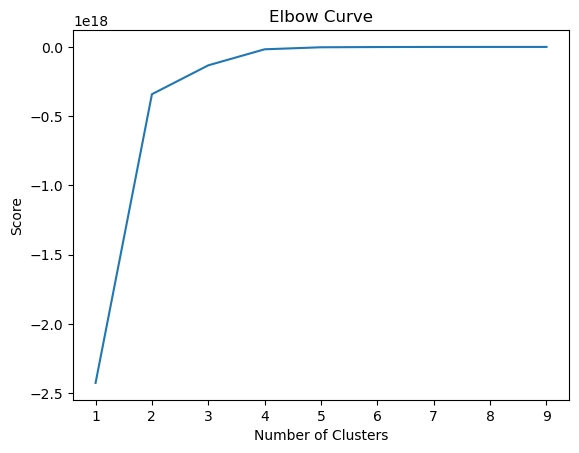

In [40]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve rises steeply from 0 to 2, continues to rise more gently from 2 to 4, then flattens. This makes 4 the optimal number of clusters.

# 7 k-means clustering

In [41]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3)

In [42]:
# Fit the k-means object to the data
kmeans.fit(df_num)

C:\Users\nsmith\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsmith\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [43]:
df_num['clusters'] = kmeans.fit_predict(df_num)

C:\Users\nsmith\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nsmith\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
df_num.head()

,HOUSING OCCUPANCY Total housing units,BEDROOMS Total housing units,HOUSING TENURE Occupied housing units,HOUSING TENURE Owner-occupied,HOUSING TENURE Renter-occupied,SELECTED CHARACTERISTICS Occupied housing units,VALUE (owner occupied) Median (dollars),MORTGAGE STATUS Owner-occupied units,Single_Family_Homes,Other_Housing_Types,Newer_Homes,Older_Homes,sm_house,med_house,lg_house,DAMAGE_PROPERTY_NUMERIC,Total_Storm_Events,County_encoded,clusters
0,37288,37288,31996,20888,11108,31996,167400,20888,23456,6431,11951,25337,12115,24153,1020,0.0,10.0,0,2
1,41426,41426,38591,28828,9763,38591,317000,28828,26189,2870,21784,19642,10760,28798,1868,0.0,23.0,1,2
2,158782,158782,145863,85609,60254,145863,262300,85609,106655,44758,77190,81592,46861,106961,4960,2934000.0,80.0,2,2
3,836113,836113,758070,449545,308525,758070,277000,449545,535338,277313,335867,500246,326105,477853,32155,0.0,164.0,3,2
4,40178,40178,36110,23235,12875,36110,160700,23235,26205,8512,11065,29113,15366,24235,577,0.0,23.0,4,2


In [45]:
df_num['clusters'].value_counts()

clusters
2    46
0     4
1     2
Name: count, dtype: int64

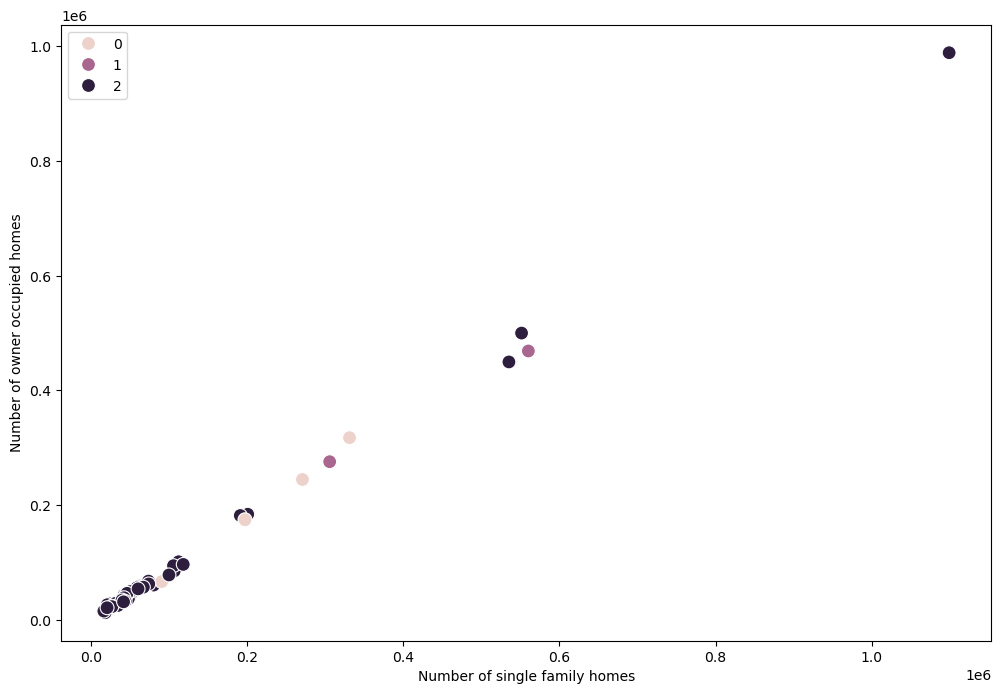

In [46]:
# Plot the clusters for the number of single family homes and owner occupied homes variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Single_Family_Homes'], y=df_num['HOUSING TENURE Owner-occupied'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of single family homes') # Label x-axis.
plt.ylabel('Number of owner occupied homes') # Label y-axis.
plt.show()

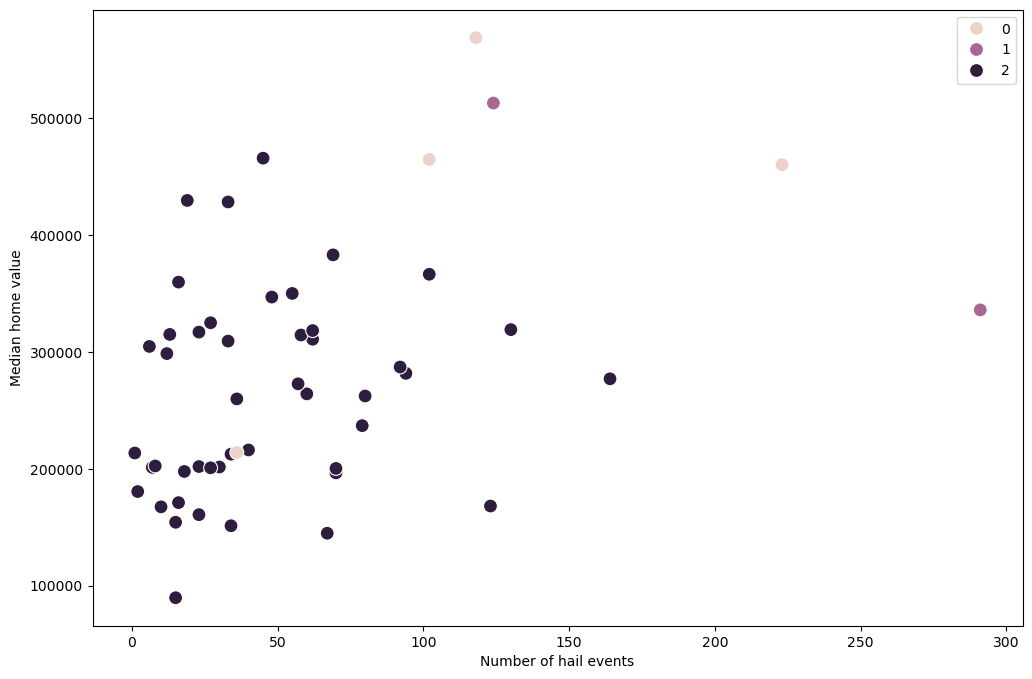

In [47]:
# Plot the clusters for the number of single family homes and median house value variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Total_Storm_Events'], y=df_num['VALUE (owner occupied) Median (dollars)'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of hail events') # Label x-axis.
plt.ylabel('Median home value') # Label y-axis.
plt.show()

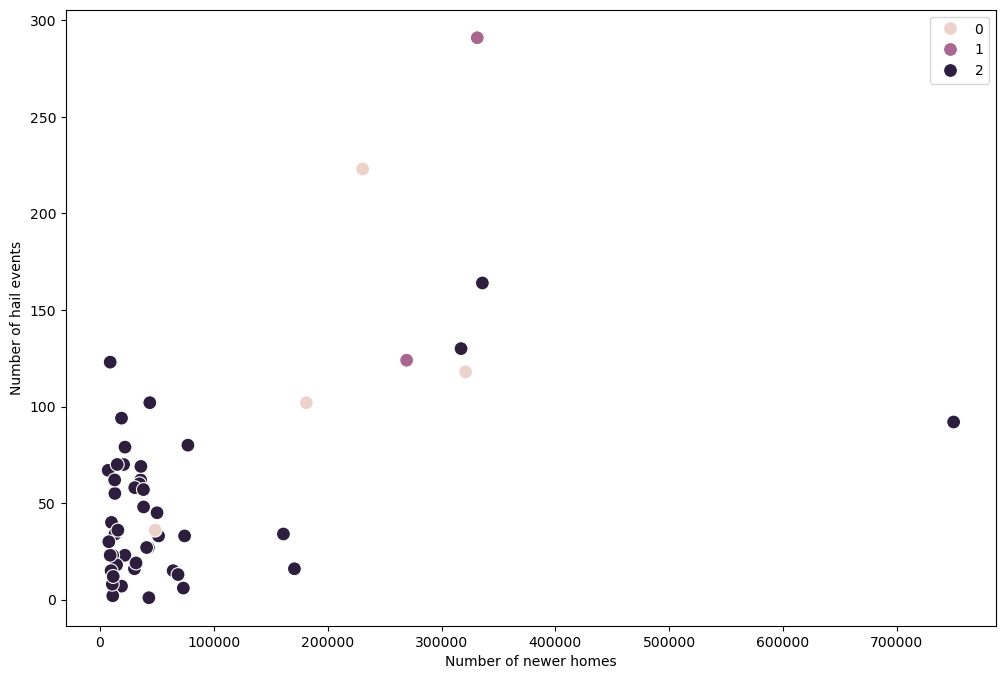

In [48]:
# Plot the clusters for the number of newer homes and total storm events variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_num['Newer_Homes'], y=df_num['Total_Storm_Events'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of newer homes') # Label x-axis.
plt.ylabel('Number of hail events') # Label y-axis.
plt.show()

In the variables examined above, nearly all of the variables fall into the "1" cluster with very few observations in the other clusters. This may be the result of the weak relationships between variables. For example, there likely isn't a relationship between the number of hail events in a county and that county's median home price. However, both variables are useful for site selection.

In [49]:
df_num.loc[df_num['clusters'] == 3, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'medium pink'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'light pink'

In [50]:
df_num.groupby('cluster').agg({'Total_Storm_Events':['mean', 'median'], 
                         'lg_house':['mean', 'median'], 
                         'HOUSING TENURE Owner-occupied':['mean', 'median'],
                          'VALUE (owner occupied) Median (dollars)':['mean', 'median']})

Total_Storm_Events             lg_house           \
                          mean median          mean   median   
cluster                                                        
light pink          119.750000  110.0  17796.250000  19703.5   
medium pink         207.500000  207.5  42863.000000  42863.0   
purple               45.826087   34.0   5863.173913   2214.0   

            HOUSING TENURE Owner-occupied            \
                                     mean    median   
cluster                                               
light pink                  200997.000000  209694.5   
medium pink                 372216.000000  372216.0   
purple                       88241.956522   42695.5   

            VALUE (owner occupied) Median (dollars)            
                                               mean    median  
cluster                                                        
light pink                            427000.000000  462550.0  
medium pink                           424550.000000  424550.0  
purple                                261660.869565  263200.0

Light Pink = Higher home values, with big homes, and high owner-occupancy. Moderate hail events. These counties might represent areas where homeowners are able to invest in their homes with roofing repairs and replacements, and larger homes could translate to more expensive jobs.

Purple = Storm-heavy, a large number of big homes, very high owner-occupancy. Home values are lower, but there may be a volume advantage.

Dark Purple = Moderate storm events, fewer large homes, moderate owner-occupied tenure, and strong home values.

Medium Pink = Lower in all categories, likely not the best counties for expansion of a roofing business.

Further analysis of these results might include ranking individual counties based on suitability, and mapping locations to find if any geographic clusters of suitable counties exists. This would give the business a larger region in which to operate. Additionally, a time series analysis of events in the suitable counties might help identify whether hail events are largely seasonal or spread out across the year. Seasonality might lead to highly variable demand for roofing services. During peak storm seasons, the volume of damage may exceed local contractors' capacity, causing delays and backlogs. Conversely, in off-seasons, the lack of storm activity can result in minimal or no work, creating downtime and financial strain for roofing businesses.

In [51]:
df_num.head()

,HOUSING OCCUPANCY Total housing units,BEDROOMS Total housing units,HOUSING TENURE Occupied housing units,HOUSING TENURE Owner-occupied,HOUSING TENURE Renter-occupied,SELECTED CHARACTERISTICS Occupied housing units,VALUE (owner occupied) Median (dollars),MORTGAGE STATUS Owner-occupied units,Single_Family_Homes,Other_Housing_Types,Newer_Homes,Older_Homes,sm_house,med_house,lg_house,DAMAGE_PROPERTY_NUMERIC,Total_Storm_Events,County_encoded,clusters,cluster
0,37288,37288,31996,20888,11108,31996,167400,20888,23456,6431,11951,25337,12115,24153,1020,0.0,10.0,0,2,purple
1,41426,41426,38591,28828,9763,38591,317000,28828,26189,2870,21784,19642,10760,28798,1868,0.0,23.0,1,2,purple
2,158782,158782,145863,85609,60254,145863,262300,85609,106655,44758,77190,81592,46861,106961,4960,2934000.0,80.0,2,2,purple
3,836113,836113,758070,449545,308525,758070,277000,449545,535338,277313,335867,500246,326105,477853,32155,0.0,164.0,3,2,purple
4,40178,40178,36110,23235,12875,36110,160700,23235,26205,8512,11065,29113,15366,24235,577,0.0,23.0,4,2,purple


In [55]:
# Merge only the 'cluster' column from df_num to df using 'County_encoded' as the common field
df_clusters = df.merge(df_num[['County_encoded', 'clusters']], on='County_encoded', how='left')


In [56]:
# Define the file name
opportunity_file = 'opportunity_score.csv'  # Choose a name for your output file

# Create the full file path using os.path.join
opportunity_path = os.path.join(data_path, opportunity_file)

# Export to CSV
df_clusters.to_csv(opportunity_path, index=False)
